# **Passenger and Cargo Load Factor Analysis - IndiGo 2023**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Loading the dataset**

In [4]:
df = pd.read_excel('indigo23.xlsx')

**2. Renaming columns for clarity:**

In [5]:
columns = [
    "Month", "Aircraft Flown", "Hours Flown", "Kilometre Flown", "Passengers Carried",
    "Passenger KMs Performed", "Available Seat KM", "Passenger Load Factor", "Freight Tonnes",
    "Mail Tonnes", "Total Tonnes", "Passenger Tonne KM", "Freight Tonne KM", "Mail Tonne KM",
    "Total Tonne KM", "Available Tonne KM", "Weight Load Factor"
]

**3. Adjust if row indexes differ**

In [6]:
df.columns = columns
df = df.drop(index=0).reset_index(drop=True)

**4. Filtering and mapping months**

In [7]:
months_abbrev = {
    'JAN': 'January', 'FEB': 'February', 'MAR': 'March', 'APR': 'April',
    'MAY': 'May', 'JUNE': 'June', 'JULY': 'July', 'AUG': 'August',
    'SEP': 'September', 'OCT': 'October', 'NOV': 'November', 'DEC': 'December'
}
df_filtered = df[df['Month'].isin(months_abbrev.keys())]
df_filtered['Month'] = df_filtered['Month'].map(months_abbrev)

<ipython-input-7-8c8690d5c061>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Month'].map(months_abbrev)


**5. Converting Load Factors to numeric values**

In [8]:
df_filtered["Passenger Load Factor"] = pd.to_numeric(df_filtered["Passenger Load Factor"], errors='coerce').fillna(0)
df_filtered["Weight Load Factor"] = pd.to_numeric(df_filtered["Weight Load Factor"], errors='coerce').fillna(0)

<ipython-input-8-3de6400dc1d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Passenger Load Factor"] = pd.to_numeric(df_filtered["Passenger Load Factor"], errors='coerce').fillna(0)
<ipython-input-8-3de6400dc1d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Weight Load Factor"] = pd.to_numeric(df_filtered["Weight Load Factor"], errors='coerce').fillna(0)


**6. Plotting the visualizations**

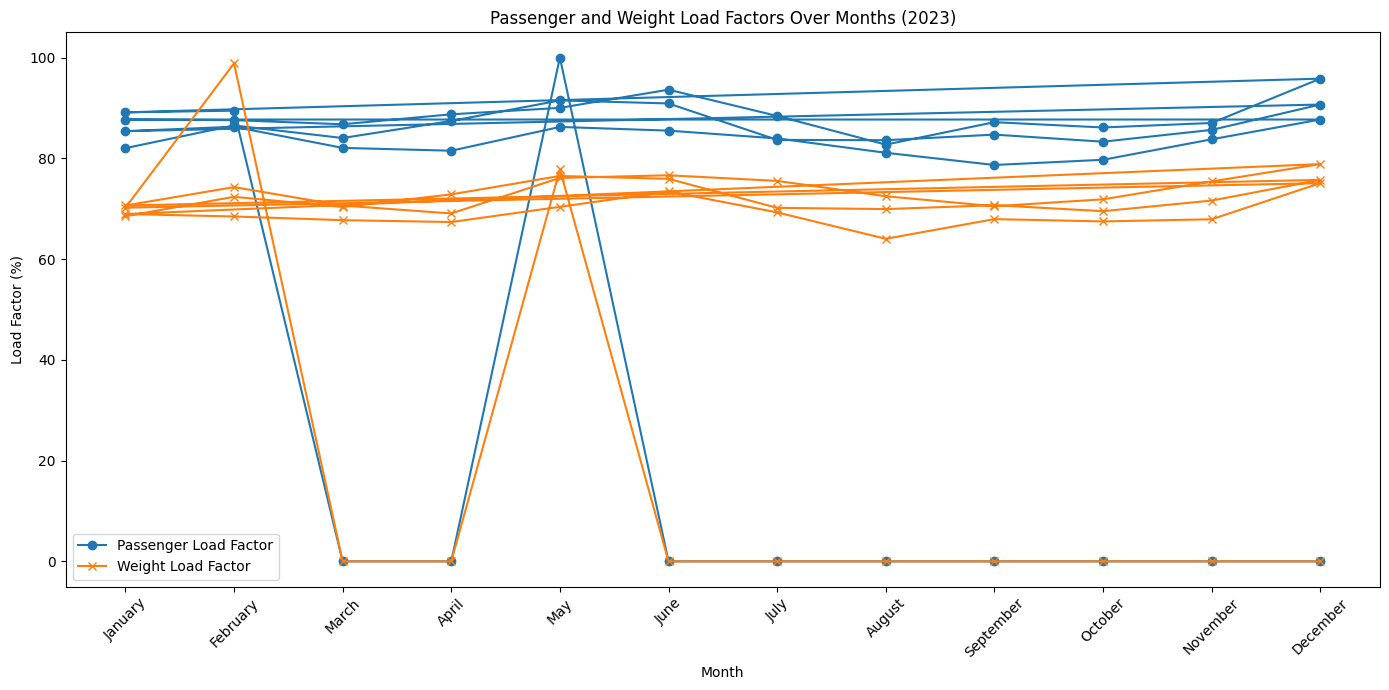

In [9]:
plt.figure(figsize=(14, 7))

plt.plot(df_filtered['Month'], df_filtered['Passenger Load Factor'], label='Passenger Load Factor', marker='o')
plt.plot(df_filtered['Month'], df_filtered['Weight Load Factor'], label='Weight Load Factor', marker='x')

plt.title('Passenger and Weight Load Factors Over Months (2023)')
plt.xlabel('Month')
plt.ylabel('Load Factor (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()